In [6]:
import pandas as pd

df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
df.head() 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
1,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
2,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
3,18/05/2020,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
4,17/05/2020,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia


In [13]:
groupby_country = df.groupby('countryterritoryCode')
groupby_country.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
1,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
2,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
3,18/05/2020,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
4,17/05/2020,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
18350,21/05/2020,21,5,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18351,20/05/2020,20,5,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18352,19/05/2020,19,5,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18353,18/05/2020,18,5,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [14]:
sum_cases_by_country = groupby_country.cases.sum()
print(sum_cases_by_country)

countryterritoryCode
ABW      101
AFG     8145
AGO       52
ALB      964
AND      762
       ...  
XKX      989
YEM      180
ZAF    18003
ZMB      832
ZWE       48
Name: cases, Length: 205, dtype: int64


In [15]:
#we will make a plot with 10 most infected countries by covid 5/21/2020
most_infected_countries = sum_cases_by_country.reset_index().nlargest(10, 'cases')
most_infected_countries

,countryterritoryCode,cases
192,USA,1551853
157,RUS,308705
25,BRA,291579
65,GBR,248293
57,ESP,232555
92,ITA,227364
48,DEU,176752
186,TUR,152587
62,FRA,143845
88,IRN,126949


<BarContainer object of 10 artists>

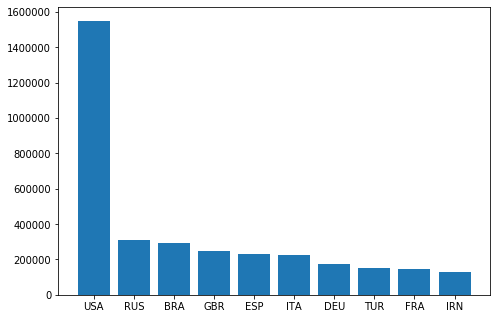

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(most_infected_countries.countryterritoryCode.unique(), most_infected_countries.cases.unique())